In this notebook, I'll go over how to load the data and extract segmentations from it.

Import all packages. The `nuclei_and_cell_segmentation` is a package designed to load data, perform segmentations, and extract features among others.

In [1]:
from packages import *
import nuclei_and_cell_segmentation
import importlib
importlib.reload(nuclei_and_cell_segmentation)
import nuclei_and_cell_segmentation as nc_seg

c:\Users\BramUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\napari_tools_menu\__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")


Define all file locations.

In [2]:
# Set some constants
IMAGES_DIR = r"01_training_dataset_tif_ROIs" # Images folder
IMAGES_LIST = os.listdir(IMAGES_DIR) # List of image file names
IMAGES_PATHS = [os.path.join(IMAGES_DIR, image) for image in IMAGES_LIST] # Paths to images

# Geojson files
GEOJSONS_DIR = r"01_training_dataset_geojson_nuclei"
GEOJSONS_LIST = os.listdir(GEOJSONS_DIR) 
GEOJSONS_PATHS = [os.path.join(GEOJSONS_DIR, image) for image in GEOJSONS_LIST] 

# Nuclei segmentations
NUCLEI_SEGS_DIR = r"01_training_dataset_nuclei_npys"
NUCLEI_SEGS_LIST = os.listdir(NUCLEI_SEGS_DIR)
NUCLEI_SEGS_PATHS = [os.path.join(NUCLEI_SEGS_DIR, image) for image in NUCLEI_SEGS_LIST] 

# Cell segmentations
CELLS_SEGS_DIR = r"01_training_dataset_cells_npys"
CELLS_SEGS_LIST = os.listdir(CELLS_SEGS_DIR)
CELLS_SEGS_PATHS = [os.path.join(CELLS_SEGS_DIR, image) for image in CELLS_SEGS_LIST]

Select data from specific file and compute segmentations. Use the `tif_and_geojson_to_segmentation` function to get the nuclei and cell segmentations.

In [3]:
# Get i-th sample
i = 0

# Get path
image, geojson_contents = nc_seg.load_tif_image(IMAGES_PATHS[i]), nc_seg.load_geojson(GEOJSONS_PATHS[i])
image = nc_seg.convert_4d_to_3d(image)

# Get segmentations
labeled_nuclei_array, labeled_cells_array = nc_seg.tif_and_geojson_to_segmentation(
    IMAGES_PATHS[i],
    GEOJSONS_PATHS[i]
)

# Print info about segmentations
print(f"Nr of segmented nuclei: {labeled_nuclei_array.max()}")
print(f"Nr of segmented cells: {labeled_cells_array.max()}")

100%|██████████| 633/633 [00:00<00:00, 3319.12it/s]


Nr of segmented nuclei: 609
Nr of segmented cells: 609


The number of nuclei and cells are the same. We can also visualize the results.

In [4]:
nc_seg.plot_nuclei_and_cell_segmentations(labeled_nuclei_array, labeled_cells_array)

We observe that nuclei are clearly contained within cell boundaries. For further inspection, we can visualize the bounding boxes of both cells and nuclei.

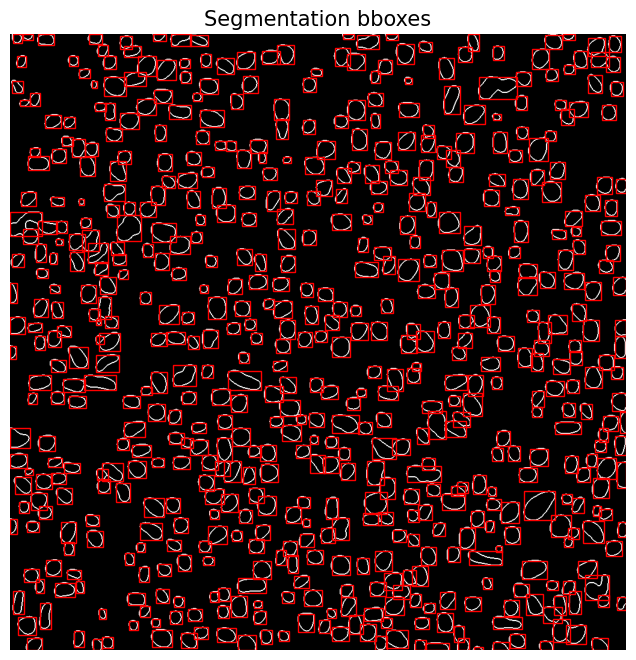

In [5]:
# Bounding boxes for nuclei
nc_seg.show_regionprops_for_segmentation(labeled_nuclei_array)

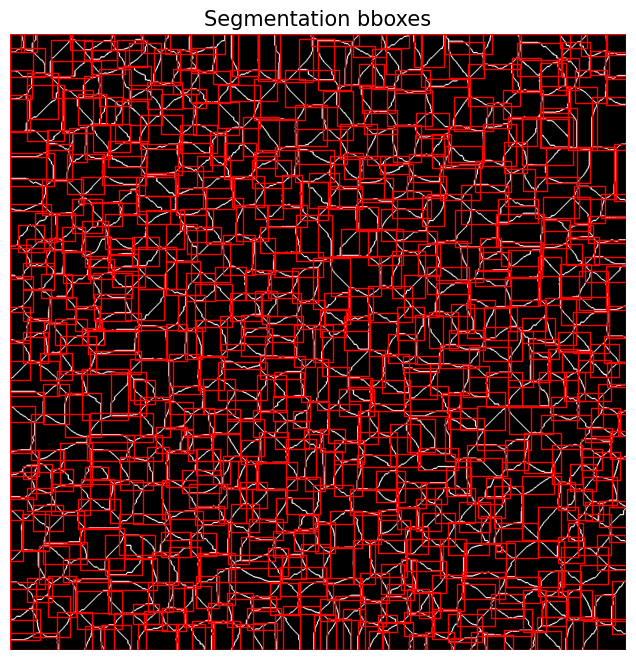

In [6]:
# Bounding boxes for cells
nc_seg.show_regionprops_for_segmentation(labeled_cells_array)

Furthermore, we can get properties of the segmentations. First, let's inspect the nuclei.

In [7]:
labeled_nuclei_props = \
    nc_seg.regionprops_from_mask(
        labeled_nuclei_array # DON'T MAKE THIS BINARY!!!
    )
    
labeled_nuclei_props.head()

,label,area,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,perimeter,coords,contours,aspect_ratio,aspect_ratio_stand,cell_shape_index,cell_shape_index_stand
0,1,181.0,6.281768,10.701657,0.874377,16.320174,14.275759,48.384776,"[[0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9...","[[4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5...",1.143209,-0.767944,3.596412,-0.785512
1,2,114.0,3.254386,28.710526,1.514342,16.516693,9.217542,40.727922,"[[0, 21], [0, 22], [0, 23], [0, 24], [0, 25], ...","[[21, 0], [21, 1], [21, 2], [21, 3], [22, 0], ...",1.791876,0.985339,3.814519,0.288230
2,3,396.0,8.815657,59.227273,1.518680,27.885383,18.223774,73.698485,"[[0, 57], [0, 58], [0, 59], [0, 60], [0, 61], ...","[[46, 6], [46, 7], [46, 8], [46, 9], [46, 10],...",1.530165,0.277960,3.703488,-0.258377
3,4,294.0,6.680272,140.904762,-1.526339,23.109096,16.522871,63.798990,"[[0, 133], [0, 134], [0, 135], [0, 136], [0, 1...","[[130, 5], [130, 6], [130, 7], [130, 8], [130,...",1.398613,-0.077613,3.720833,-0.172990
4,5,161.0,4.142857,246.726708,-1.441039,18.907445,11.670130,50.763456,"[[0, 238], [0, 239], [0, 240], [0, 241], [0, 2...","[[238, 0], [238, 1], [239, 0], [239, 1], [239,...",1.620157,0.521200,4.000721,1.204899


Then the cells.

In [8]:
labeled_cells_props = \
    nc_seg.regionprops_from_mask(
        labeled_cells_array
    )
    
labeled_cells_props.head()

,label,area,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,perimeter,coords,contours,aspect_ratio,aspect_ratio_stand,cell_shape_index,cell_shape_index_stand
0,1,587.0,13.597956,9.741056,-0.163578,31.838739,24.731303,94.970563,"[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5...","[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5...",1.287386,-0.588112,3.919855,-1.141130
1,2,479.0,11.054280,30.672234,-0.089163,30.733568,22.602749,95.248737,"[[0, 18], [0, 19], [0, 20], [0, 21], [0, 22], ...","[[18, 0], [19, 0], [19, 1], [19, 2], [20, 0], ...",1.359727,-0.418307,4.352026,0.237648
2,3,2277.0,21.808959,65.018884,-0.696343,68.625311,52.662504,227.580736,"[[0, 44], [0, 45], [0, 46], [0, 47], [0, 48], ...","[[37, 15], [37, 16], [37, 17], [37, 18], [37, ...",1.303115,-0.551191,4.769293,1.568876
3,4,1209.0,9.272126,133.535153,-1.509786,68.072764,26.232797,171.154329,"[[0, 100], [0, 101], [0, 102], [0, 103], [0, 1...","[[100, 0], [100, 1], [100, 5], [101, 0], [101,...",2.594949,2.481113,4.922375,2.057263
4,5,972.0,10.470165,190.215021,-1.372131,51.248405,26.061167,137.012193,"[[0, 172], [0, 173], [0, 174], [0, 175], [0, 1...","[[168, 9], [168, 10], [168, 11], [168, 12], [1...",1.966466,1.005884,4.394668,0.373692


Let's merge the labeled_nuclei_array and labeled_cell_array and only keep the cell shape indices and aspect ratios.

In [9]:
# Let's merge them
labeled_nuclei_and_cell_props = pd.merge(
    left=labeled_nuclei_props,
    right=labeled_cells_props,
    how="inner",
    on="label",
    suffixes=["_nucleus", "_cell"]
)

# Only keep `aspect_ratio_nucleus`, `cell_shape_index_nucleus`, `aspect_ratio_cell`, `cell_shape_index_cell`
stand = "_"
labeled_nuclei_and_cell_props_cenus = \
    labeled_nuclei_and_cell_props.loc[:, 
                                      [f"aspect_ratio{stand}nucleus", f"cell_shape_index{stand}nucleus", 
                                       f"aspect_ratio{stand}cell", f"cell_shape_index{stand}cell"]
                                    ]
labeled_nuclei_and_cell_props_cenus.rename(columns={f"cell_shape_index{stand}nucleus": f"nucleus_shape_index{stand[:-1]}",
                                                    f"cell_shape_index{stand}cell": f"cell_shape_index{stand[:-1]}"},
                                           inplace=True)

Let's see how all variables are related to each other.

<Figure size 2400x800 with 0 Axes>

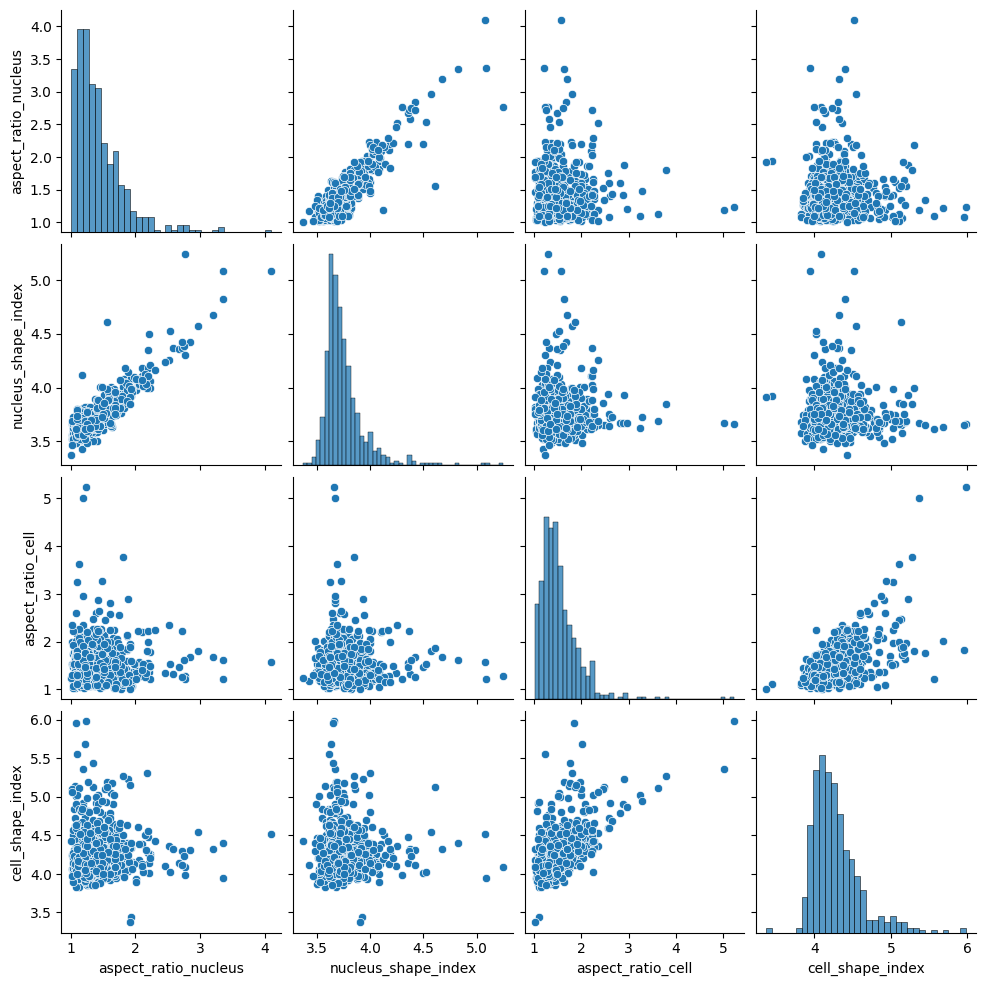

In [10]:
plt.figure(figsize=(24, 8))
sns.pairplot(labeled_nuclei_and_cell_props_cenus)
plt.show()

# Visualize total pipeline

Let's give an example visualization of how the overall pipeline will look.

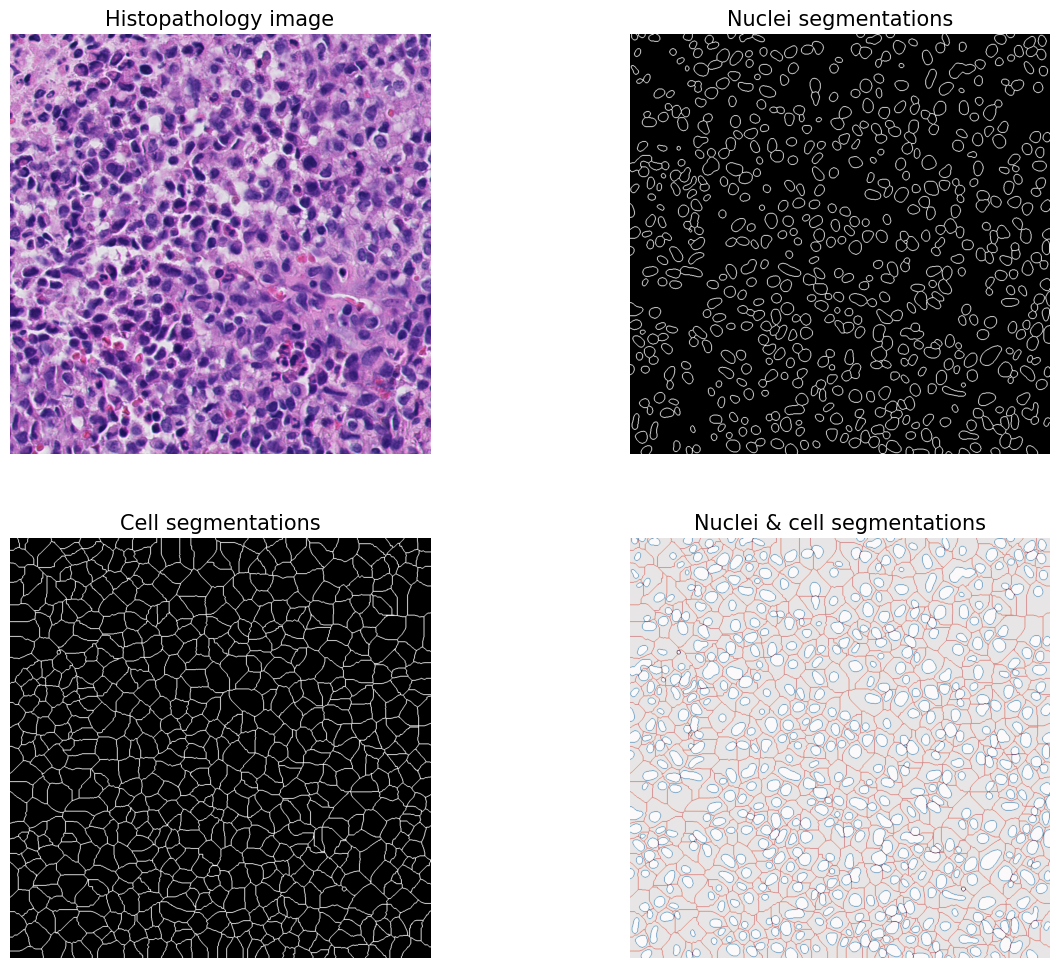

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

# Show histopathology image
axes[0, 0].imshow(image)
axes[0, 0].set_axis_off()
axes[0, 0].set_title("Histopathology image", fontsize=15)

# Show nuclei segmentation
nuclei_segmentations = np.load(NUCLEI_SEGS_PATHS[i])
nuclei_boundaries = find_boundaries(
    np.load(NUCLEI_SEGS_PATHS[i])
)

axes[0, 1].imshow(
    nuclei_boundaries,
    cmap="binary_r"
)
axes[0, 1].set_axis_off()
axes[0, 1].set_title("Nuclei segmentations", fontsize=15)

# Show cells segmentation
cells_segmentations = np.load(CELLS_SEGS_PATHS[i])
cells_boundaries = find_boundaries(
    np.load(CELLS_SEGS_PATHS[i])
)

axes[1, 0].imshow(
    cells_boundaries,
    cmap="binary_r"
)
axes[1, 0].set_axis_off()
axes[1, 0].set_title("Cell segmentations", fontsize=15)

# Visualize total pipeline
axes[1, 1].imshow(
    nuclei_segmentations > 0, 
    cmap="gray", 
    alpha=0.5
)
axes[1, 1].imshow(
    cells_boundaries,
    cmap="Reds",
    alpha=0.7
)
axes[1, 1].imshow(
    nuclei_boundaries,
    cmap="Blues",
    alpha=0.5
)
axes[1, 1].set_axis_off()
axes[1, 1].set_title("Nuclei & cell segmentations", fontsize=15)

# Adjust plots and save
fig.subplots_adjust(wspace=-0.5)
plt.savefig(r"example_pipeline.pdf", bbox_inches="tight")
plt.show()

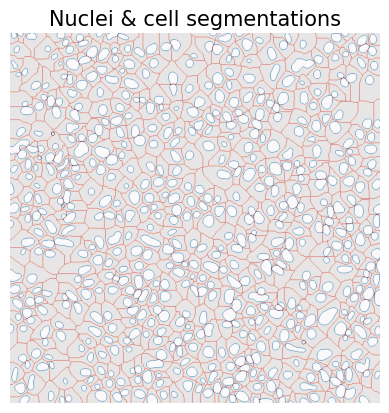

In [14]:
# Visualize total pipeline
plt.figure()
plt.imshow(
    nuclei_segmentations > 0, 
    cmap="gray", 
    alpha=0.5
)
plt.imshow(
    cells_boundaries,
    cmap="Reds",
    alpha=0.7
)
plt.imshow(
    nuclei_boundaries,
    cmap="Blues",
    alpha=0.5
)
plt.axis("off")
plt.title("Nuclei & cell segmentations", fontsize=15)

plt.show()